In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
import datetime as dt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
np.set_printoptions(precision=3)

In [30]:
# Change to Results Directory
%cd results/11-23/


/home/spencer/School/results/11-23


In [2]:
# need to run qualifier, rank indices before

In [11]:
%matplotlib inline
plt.style.use('ggplot')
today = str(dt.datetime.today().month) + '-' + str(dt.datetime.today().day)
os.mkdir(r'results/' + today)

### Importing Data

site_list = ['Saginaw Malleable','Pontiac North Industrial','Linden Road','Bay City Powertrain','Coldwater Road','Davison Road','Greenpoint','Hemphill','Saginaw Malleable Peninsula','Van Buren','Buick City','Flint West (Kettering)','Danville','Allison Gas Turbine','Framingham','Massena','Salina', 'Tonawanda','Elyria','Toledo']
# Loads Previously Created Data (3D matrix, depth = 100, columns are criteria, rows are sites)
results = np.load('results.npy') 

N=100 # number of simulations is N-1, referred to as N

# Import weights, use as np.dot(A,wgts)
# 1 Incentives, 2 Permitting, 3 Substation, 4 Environmental, 5 Proximity to Partners,
# 6 Weather, 7 Access, 8 Solar Radiation, 9 Land Stabillity
eyes = eye((11)).A
arr = np.array([20., 16., 15., 15., 8., 5., 5., 5., 4., 4., 3.])/100
wgts = eyes*arr

## Sensitivity Analysis - Part 2

# Analysis setting all (1) Incentives, (2) Permitting, (3) Substation, and (4) Environmental Equal

In [ ]:
# Run Uniform

### Basecase (4)

/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


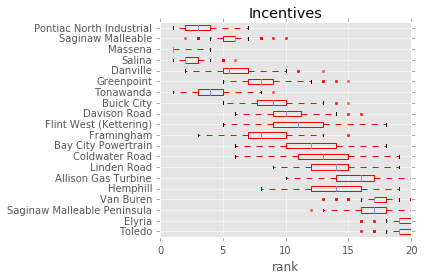

In [85]:
#### Use for BaseCase

t2 = '$N=100$, $\sigma = 1$'
def plot_results(_type, _qualifiertext, _arr, _n, _wgts, _site_list, _rix):
    # _type is 'score' or 'rank'
    score_list = []
    
    if _type == 'score':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]))
    if _type == 'rank':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]).rank(ascending=False))
            
    scores = pd.DataFrame(score_list)
    # Reindexing
    scores = scores.reindex_axis(_rix, axis=1)
    # Plot as 10 histograms of distribution of scores
    flierprops = dict(marker='.', markerfacecolor='red', alpha=0.6, markersize=6, markeredgecolor='none')
    bp = scores.boxplot(vert=0, flierprops=flierprops)
    plt.setp(bp['boxes'], color='red')
    plt.setp(bp['whiskers'],color='red')
    plt.setp(bp['fliers'],color='red')
    plt.tight_layout()
    plt.xlabel(_type)
    plt.title(_qualifiertext)
    plt.savefig(r'Base_' + _qualifiertext + r'_' + _type + '.png', transparent=True, dpi=1000)
    plt.show()
    
    return scores

#basescores = plot_results('score', qualifier, results, N, wgts, site_list)
#baseranks = plot_results('rank', qualifier, results, N, wgts, site_list, _rix)

### Run for Uniformity (1)


In [79]:
## Incentives

# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_uni = np.copy(results)
results_uni[:,0,:]=5
qualifier = 'Incentives'

In [78]:
#### Permitting

# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_uni = np.copy(results)
results_uni[:,1,:]=5
qualifier = 'Permitting'

In [27]:
#### Substation

# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_uni = np.copy(results)
results_uni[:,2,:]=5
qualifier = 'Substation'

In [5]:
#### Evironmental

# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_uni = np.copy(results)
results_uni[:,3,:]=5
qualifier = 'Environmental'

### Sort by Upper Fence (3)

In [80]:
qualifier

'Incentives'

In [83]:
# Find upper fence
ranks.quantile(0.25)

# Sort by descending quantiles
sort = ranks.quantile(0.25).sort_values(ascending=False)
rix = sort.index # actually a column

# Reindex
ranks_inc = ranks.reindex_axis(rix, axis=1)

### Plot Uniform (2)

/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


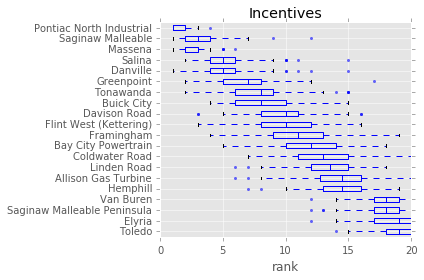

In [82]:
# With the Sorted Quantiles Reindexing

def plot_results_uniform(_type, _qualifiertext, _arr, _n, _wgts, _site_list):
    # _type is 'score' or 'rank'
    score_list = []
    
    if _type == 'score':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]))
    if _type == 'rank':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]).rank(ascending=False))        
    scores = pd.DataFrame(score_list)
    rix = scores.quantile(.25).sort_values(ascending=False).index
    scores = scores.reindex_axis(rix, axis=1)
    # Plot as 10 historgrams of distribution of scores
    flierprops = dict(marker='.', markerfacecolor='blue', alpha=0.6, markersize=6, markeredgecolor='none')
    bp = scores.boxplot(vert=0, flierprops=flierprops)
    plt.setp(bp['boxes'], color='blue')
    plt.setp(bp['whiskers'],color='blue')
    plt.setp(bp['fliers'],color='blue')
    plt.setp(bp['medians'], color='blue')
    plt.tight_layout()
    plt.xlabel(_type)
    plt.title(_qualifiertext)
    plt.savefig( _qualifiertext + r'_' + _type + '.png', transparent=True, dpi=1000)
    plt.show()
    
    return scores

# scores = plot_results_uniform('score', qualifier, results_uni, N, wgts, site_list)
ranks = plot_results_uniform('rank', qualifier, results_uni, N, wgts, site_list)
_rix = ranks.columns

### Buick Sensitivity

In [22]:
env_sens = pd.read_csv('results/11-23/data_enviro', index_col=0 )


In [53]:
buick_new = env_sens[['Buick City']]
buick_new.columns = ['Buick City Improved']

In [55]:
buick_old = baseranks[['Buick City']]
buick_old.columns = [['Buick City Original']]

/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


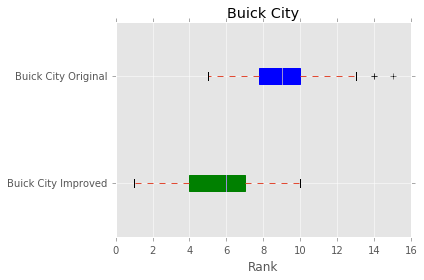

In [104]:
flierprops = dict(marker='.', markerfacecolor='blue', alpha=0.6, markersize=6, markeredgecolor='none')
bp = pd.concat([buick_new, buick_old]).boxplot(vert=0, patch_artist=True)
colors = ['green', 'blue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_color(color)
plt.tight_layout()
plt.xlabel('Rank')
plt.title('Buick City Environmental Analysis')
#plt.savefig(r'results/' + today + r'/' + 'Buick City_' + _type + '.png', transparent=True, dpi=1000)
plt.show()
plt.gcf().savefig('buick_comparison.png', transparent = True, dpi=1000)

### Michigan Incentives Comparison

In [99]:
mi_inc = ranks[['Pontiac North Industrial','Saginaw Malleable']]
mi_inc.columns = ['Pontiac North w/ Incentives', 'Saginaw Malleable w/ Incentives']

In [100]:
mi_old = baseranks[['Pontiac North Industrial','Saginaw Malleable']]

In [101]:
order = ['Saginaw Malleable','Pontiac North Industrial', 'Saginaw Malleable w/ Incentives', 'Pontiac North w/ Incentives']
mi_comp = pd.concat([mi_inc, mi_old])
mi_comp = mi_comp[order]; mi_comp

,Saginaw Malleable,Pontiac North Industrial,Saginaw Malleable w/ Incentives,Pontiac North w/ Incentives
0,NaN,NaN,3.0,1.0
1,NaN,NaN,5.0,1.0
2,NaN,NaN,9.0,1.0
3,NaN,NaN,3.0,1.0
4,NaN,NaN,4.0,1.0
5,NaN,NaN,3.0,2.0
6,NaN,NaN,3.0,2.0
7,NaN,NaN,2.0,1.0
8,NaN,NaN,5.0,1.0
9,NaN,NaN,6.0,1.0


/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


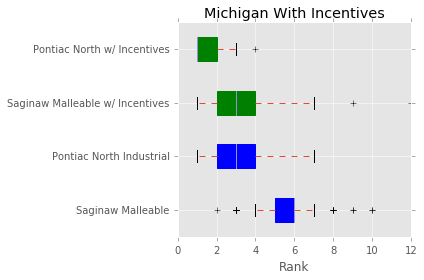

In [102]:
bp = mi_comp.boxplot(vert=0, patch_artist=True)
colors = ['blue', 'blue', 'green', 'green']
for patch, color in zip(bp['boxes'], colors):
    patch.set_color(color)
plt.tight_layout()
plt.xlabel('Rank')
plt.title('Michigan Incentives Analysis')
#plt.savefig(r'results/' + today + r'/' + 'Buick City_' + _type + '.png', transparent=True, dpi=1000)
plt.show()
plt.gcf().savefig('michigan_comparison.png')

### Now use X1 terminal and image_magik to overlay plots
Example:  
`composite [top].png [bottom].png overlay.png`


In [86]:
! composite Incentives_rank.png Base_Incentives_rank.png overlay_inc.png


### Other Code

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


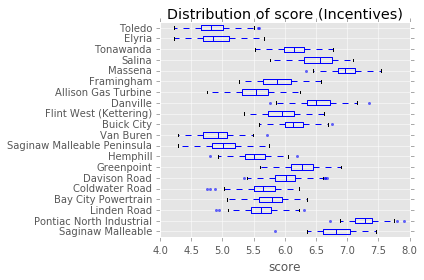

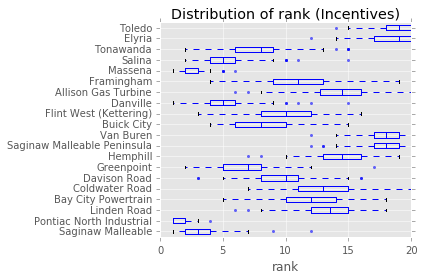

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


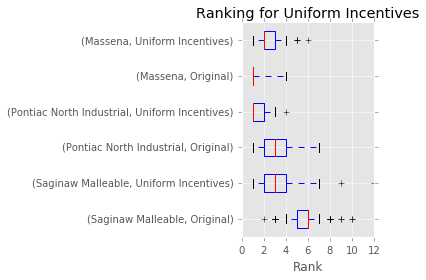

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:47: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


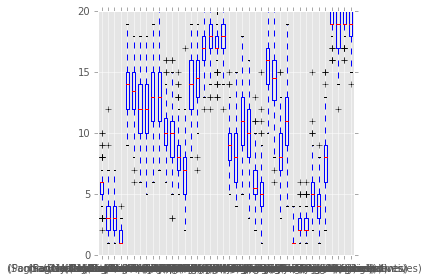

In [6]:
# Hierarchical index 0 is Base, 1 is Uniform on One Variable
df_ranks = pd.concat([baseranks, ranks], keys=[i for i in range(0,100)])
df_ranks.index = df_ranks.index.set_levels([['Original','Uniform Incentives'],[i for i in range(0,100)]])
df_ranks = df_ranks.unstack(0); df_ranks

# Plotting Saginaw, Pontiac North, and Massena
df_ranks[['Saginaw Malleable','Pontiac North Industrial','Massena']].boxplot(vert=0)
plt.title('Ranking for Uniform Incentives')
plt.xlabel('Rank')
plt.tight_layout()
plt.savefig('Incentives_Plot1.pdf')
plt.show()

df_ranks.boxplot(); plt.show()